<a href="https://colab.research.google.com/github/ovi-saha/MSCS_634_ProjectDeliverable_2/blob/main/MSCS_634__ProjectDeliverable__2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Residency Day 2: Project Deliverable 2: Regression Modeling and Performance Evaluation
### Group Members:  
Avijit Saha  
Pranoj Thapa  
Sandip KC  
Bharath Singareddy

**Advanced Big Data and Data Mining (MSCS-634-M20)**  

Dr. Satish Penmatsa

**February 14, 2026**

### 1. Overview
Deliverable 2 focuses on developing predictive regression models to estimate passenger travel metrics using historical transportation data from the Bureau of Transportation Statistics. After completing data cleaning, exploratory analysis, and feature engineering in Deliverable 1, the dataset is now structured and enriched with meaningful features such as temporal trends and categorical transportation modes.

The primary objective of this deliverable is to build and evaluate regression models that predict the travel metric (Value) using relevant features such as year, transportation mode, and statistical category. By applying both basic and regularized regression techniques, we aim to assess how well these variables explain variations in passenger travel activity.

In addition to model building, this deliverable emphasizes rigorous performance evaluation using quantitative metrics such as R-squared, Mean Squared Error (MSE), and Root Mean Squared Error (RMSE). Cross-validation is also applied to ensure that the model generalizes well to unseen data. The ultimate goal is to understand the predictive relationships within the dataset and determine which modeling approach provides the most reliable performance.

We got this data from: https://data.bts.gov/Research-and-Statistics/Passenger_Travel_Facts_and_Figures_Latest/pqmc-mnds/about_data

### 2. Dataset Description
| Column           | Description                                         |
| ---------------- | --------------------------------------------------- |
| Visualization ID | Unique identifier for each record                   |
| Mode             | Transportation mode (Air, Rail, Highway, etc.)      |
| Statistic        | Type of metric reported (e.g., Passenger Miles)     |
| Year             | Year of data collection                             |
| Value            | Numeric value of the metric                         |
| Name             | Description of the metric                           |
| Year , Year 1    | Duplicate/extra year columns (ignored for analysis) |


Notes:

* The dataset contains 500+ records with multiple metrics per year and mode.

* Some columns have missing values and duplicates, which need to be cleaned before analysis.

###3. Load and Inspect Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("/content/Passenger_Travel_Facts_and_Figures_Latest_20260213.csv")

# Preview
df.head()

,Visualization ID,Mode,Statistic,Year,Value,Units,Name,Year,Percent_1,change_from_previous_year_1,Commuting Mode,Rank,Date,Year 1
0,Figure 2-10,Number of household drivers,1,2001.0,1.2,NaN,Average Number of Vehicles per Household by Nu...,2001.0,NaN,NaN,NaN,NaN,NaN,2001.0
1,Figure 2-10,Number of household drivers,2,2001.0,2.2,NaN,Average Number of Vehicles per Household by Nu...,2001.0,NaN,NaN,NaN,NaN,NaN,2001.0
2,Figure 2-10,Number of household drivers,3,2001.0,3,NaN,Average Number of Vehicles per Household by Nu...,2001.0,NaN,NaN,NaN,NaN,NaN,2001.0
3,Figure 2-10,Number of household drivers,4,2001.0,3.8,NaN,Average Number of Vehicles per Household by Nu...,2001.0,NaN,NaN,NaN,NaN,NaN,2001.0
4,Figure 2-10,Number of household drivers,5,2001.0,4.2,NaN,Average Number of Vehicles per Household by Nu...,2001.0,NaN,NaN,NaN,NaN,NaN,2001.0


Explanation:

* We use Pandas, a powerful Python library for data manipulation and analysis.

* The read_csv() function reads the CSV file into a DataFrame, which is a tabular structure similar to a spreadsheet.

* Once loaded, df contains all rows and columns from the dataset, ready for analysis.

* The head() function displays the first 5 rows of the dataset.

* This gives a quick look at the columns, data types, and sample values.

* From this preview, we can notice issues like extra spaces in column names, duplicate columns, or unexpected data formatting.

Insight:

* In this dataset, we noticed multiple columns for Year (Year, Year , Year 1) and numeric metrics in Value.

* Early inspection helps identify which columns are relevant for analysis and which may need cleaning or removal.

In [ ]:
# Structure
df.info()

# Summary statistics
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21578 entries, 0 to 21577
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Visualization ID             21578 non-null  object 
 1   Mode                         21478 non-null  object 
 2   Statistic                    19962 non-null  object 
 3   Year                         21574 non-null  float64
 4   Value                        20184 non-null  object 
 5   Units                        9026 non-null   object 
 6   Name                         19759 non-null  object 
 7   Year                         21574 non-null  float64
 8   Percent_1                    1059 non-null   object 
 9   change_from_previous_year_1  224 non-null    float64
 10  Commuting Mode               390 non-null    object 
 11  Rank                         1744 non-null   float64
 12  Date                         5390 non-null   object 
 13  Year 1          

,Year,Year,change_from_previous_year_1,Rank,Year 1
count,21574.000000,21574.000000,224.000000,1744.000000,21574.000000
mean,2009.916844,2009.916844,7.663393,7.931766,2009.916056
std,9.712181,9.712181,16.832387,6.820579,9.711079
min,1960.000000,1960.000000,-35.400000,1.000000,1960.000000
25%,2003.000000,2003.000000,-1.375000,3.000000,2003.000000
50%,2011.000000,2011.000000,2.700000,6.000000,2011.000000
75%,2018.000000,2018.000000,16.875000,11.000000,2018.000000
max,2025.000000,2025.000000,60.700000,40.000000,2025.000000


Explanation:

* info() shows a summary of the dataset, including the total number of rows, column names, data types, and non-null counts.

* This helps identify missing values or columns with inconsistent types (e.g., numeric data stored as strings).

* describe() generates summary statistics for numeric columns, including count, mean, standard deviation, minimum, maximum, and quartiles.

* This helps understand the distribution and range of values and can highlight extreme outliers.

Insight:

* Missing values are common in government datasets, so we can see which columns need imputation or removal.

* We also check if columns like Year and Value are numeric or need conversion.

* For example, we can see which years had unusually high or low travel metrics, or detect inconsistencies in the Value column.

* This step informs later decisions on outlier treatment and feature engineering.

### 4. Data Cleaning

In [ ]:
df.isnull().sum()

,0
Visualization ID,0
Mode,100
Statistic,1616
Year,4
Value,1394
Units,12552
Name,1819
Year,4
Percent_1,20519
change_from_previous_year_1,21354


From the output we can see some of the values are missing. So we need to clear the data.

#### 4.1 Drop Columns with Excessive Missing Values

In [ ]:
# Check percentage of missing values
missing_percentage = df.isnull().mean() * 100
print(missing_percentage)

# Drop columns with more than 50% missing values
df = df.loc[:, missing_percentage < 50]

Visualization ID                0.000000
Mode                            0.463435
Statistic                       7.489109
Year                            0.018537
Value                           6.460284
Units                          58.170359
Name                            8.429882
Year                            0.018537
Percent_1                      95.092224
change_from_previous_year_1    98.961906
Commuting Mode                 98.192604
Rank                           91.917694
Date                           75.020855
Year 1                          0.018537
dtype: float64


Explanation:

Columns such as, Percent_1, change_from_previous_year_1, Commuting Mode, Rank contain too many missing values to be reliable for modeling. Removing them prevents introducing bias or noise.

#### 4.2 Clean Core Columns
The most important columns appear to be:
* Mode

* Statistic

* Year

* Value

* Units

* Name

We should only keep rows where Value and Year exist.

In [ ]:
# Show all column names with indexes
for i, col in enumerate(df.columns):
    print(i, repr(col))

0 'Visualization ID'
1 'Mode'
2 'Statistic'
3 'Year'
4 'Value'
5 'Name'
6 'Year '
7 'Year 1'


In [ ]:
df.head()

,Visualization ID,Mode,Statistic,Year,Value,Name,Year,Year 1
0,Figure 2-10,Number of household drivers,1,2001.0,1.2,Average Number of Vehicles per Household by Nu...,2001.0,2001.0
1,Figure 2-10,Number of household drivers,2,2001.0,2.2,Average Number of Vehicles per Household by Nu...,2001.0,2001.0
2,Figure 2-10,Number of household drivers,3,2001.0,3,Average Number of Vehicles per Household by Nu...,2001.0,2001.0
3,Figure 2-10,Number of household drivers,4,2001.0,3.8,Average Number of Vehicles per Household by Nu...,2001.0,2001.0
4,Figure 2-10,Number of household drivers,5,2001.0,4.2,Average Number of Vehicles per Household by Nu...,2001.0,2001.0


In [ ]:
df = df.dropna(subset=['Value', 'Year'])

**Explanation:**

The Value column is essential because it contains the main travel statistic.
Without it, the record has no analytical value.

#### 4.3 Fill Remaining Categorical Missing Values

In [ ]:
categorical_cols = df.select_dtypes(include='object').columns
df[categorical_cols] = df[categorical_cols].fillna("Unknown")

Explanation:

Missing categorical values are replaced with "Unknown" so we do not lose additional data unnecessarily.

#### 4.4 Convert Data Types Properly

In [ ]:
df['Year'] = df['Year'].astype(int)
df['Value'] = pd.to_numeric(df['Value'], errors='coerce')

Explanation:

* Ensures Year is numeric for trend analysis

* Converts Value into proper numeric format for regression

#### 4.5 Remove Duplicates

In [ ]:
df.drop_duplicates(inplace=True)

Explanation:  
Duplicate rows can distort summary statistics and model results. This ensures each record is unique.

#### 4.7 Handle Outliers (IQR Method)

In [ ]:
Q1 = df['Value'].quantile(0.25)
Q3 = df['Value'].quantile(0.75)
IQR = Q3 - Q1

df = df[(df['Value'] >= Q1 - 1.5*IQR) & (df['Value'] <= Q3 + 1.5*IQR)]

Explanation:
Removes extreme high or low values that could distort analysis, especially in regression models.

In [ ]:
#showing Data
df.head()

,Visualization ID,Mode,Statistic,Year,Value,Name,Year,Year 1,High_Travel_Year,Value_Change
1623,Figure 2-9,"$100000 - $199,999",No Vehicle,2022,9.1,Vehicles per Driver by Household Income,2022.0,2022.0,0,NaN
1629,Figure 2-9,"$100000 - $199,999",1-2 Vehicles,2022,22.1,Vehicles per Driver by Household Income,2022.0,2022.0,1,13.0
1635,Figure 2-9,"$100000 - $199,999",3-5 Vehicles,2022,36.9,Vehicles per Driver by Household Income,2022.0,2022.0,1,14.8
1641,Figure 2-9,"$100000 - $199,999",6+ Vehicles,2022,36.8,Vehicles per Driver by Household Income,2022.0,2022.0,1,-0.1
1647,Figure 2-9,"$100000 - $199,999",No Driver,2022,4.6,Vehicles per Driver by Household Income,2022.0,2022.0,0,-32.2


Overall, cleaning the dataset is crucial to ensure the integrity and reliability of subsequent analyses. Missing values in the Year and Value columns were removed because these are central to modeling and trend analysis. Missing categorical values were filled with "Unknown" to retain maximum usable data. Duplicates were removed to prevent redundancy and bias. Finally, numeric columns were converted to the correct data type to enable calculations, plotting, and feature engineering.

### 5. Feature Engineering

In [ ]:
print(df.columns)

Index(['Visualization ID', 'Mode', 'Statistic', 'Year', 'Value', 'Name',
       'Year ', 'Year 1', 'High_Travel_Year', 'Value_Change'],
      dtype='object')


In [ ]:
# Ensure 'Year' column is numeric
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

# Drop rows where 'Year' or 'Value' is missing
df = df.dropna(subset=['Year', 'Value'])

# Convert 'Value' to numeric
df['Value'] = pd.to_numeric(df['Value'], errors='coerce')

# Binary classification: High vs Low travel year
median_value = df['Value'].median()
df['High_Travel_Year'] = (df['Value'] > median_value).astype(int)

# Optional: Year-over-year change for each Mode
df = df.sort_values(by=['Mode', 'Year'])
df['Value_Change'] = df.groupby('Mode')['Value'].diff()

Explanation

* Removed Population dependency because it doesn’t exist in this dataset.

* Created High_Travel_Year binary feature for future classification.

* Added Value_Change to track trends over time per Mode.

* Cleaned duplicate/misleading Year columns by selecting one (Year).

After cleaning, we enhanced the dataset with additional features to provide more analytical value. The High_Travel_Year feature classifies each record as high or low travel based on the median value, which will be useful for classification tasks in future deliverables. The Value_Change feature captures the difference in travel metrics compared to the previous year for each transportation mode. This temporal feature provides insight into trends and changes in travel behavior over time, which is valuable for regression and clustering analyses.

Insight:

Plotting travel metrics over time reveals that passenger travel generally increases across the years, with occasional drops likely caused by economic or transportation disruptions. Separating by mode shows that highway travel dominates the overall activity, while air and rail show more variability and fluctuations.

### 6. Feature Engineering for Regression

We already have Year, Mode, Statistic, Value, High_Travel_Year, and Value_Change. For regression, we need numeric or encoded features.

In [ ]:
# One-hot encode categorical variables for regression
df_reg = pd.get_dummies(df, columns=['Mode', 'Statistic'], drop_first=True)

# Optional: Fill any remaining missing numeric values
df_reg['Value_Change'] = df_reg['Value_Change'].fillna(0)

# Features (X) and target (y)
X = df_reg.drop(columns=['Value', 'Name', 'Visualization ID'])
y = df_reg['Value']

Before building regression models, it is necessary to ensure that all input features are numerical. Since regression algorithms in scikit-learn cannot directly process categorical variables, we transform categorical features such as Mode and Statistic using one-hot encoding. This process converts each category into a binary column indicating the presence or absence of that category in a record.

Additionally, the previously engineered feature Value_Change is retained as it captures temporal trends, which may improve predictive accuracy. Any missing values in engineered numeric features are handled appropriately to avoid training errors.

The target variable for regression modeling is Value, which represents the passenger travel metric. All remaining relevant variables serve as predictors. This structured preparation ensures that the dataset is suitable for training regression algorithms.

### 7. Train-Test Split

In [ ]:
from sklearn.model_selection import train_test_split

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

To properly evaluate model performance, the dataset is divided into training and testing subsets. The training set is used to fit the regression models, while the test set evaluates their performance on unseen data.

An 80-20 split is used, meaning 80% of the data is allocated for training and 20% for testing. This approach prevents overfitting and ensures that performance metrics reflect the model’s ability to generalize rather than memorize patterns from the dataset.

Using a fixed random state ensures reproducibility, meaning that results remain consistent each time the notebook is executed.

### 8. Regression Models

We will implement Linear Regression and Ridge Regression as examples.

**Checking tha data type before regression**

In [ ]:
print(X.dtypes)
print(y.dtypes)

Year                                 int64
Year                               float64
Year 1                             float64
High_Travel_Year                     int64
Value_Change                       float64
                                    ...   
Statistic_Weekdays                    bool
Statistic_Weekends and holidays       bool
Statistic_Work                        bool
Statistic_Work-related                bool
Statistic_Work-related business       bool
Length: 2219, dtype: object
float64


Since some of the data is showing boolean so chaning it into integer.

In [ ]:
# Convert all boolean columns to integers (0 and 1)
# Convert only boolean columns
bool_cols = X.select_dtypes(include=['bool']).columns
X[bool_cols] = X[bool_cols].astype(int)

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

In [ ]:
import statsmodels.api as sm

# Select meaningful features only
X = df_reg[['Year', 'High_Travel_Year']]
y = df_reg['Value']

# Add constant
X = sm.add_constant(X)

# Fit model
model = sm.OLS(y, X)
results = model.fit()

print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       0.537
Model:                            OLS   Adj. R-squared:                  0.537
Method:                 Least Squares   F-statistic:                     6712.
Date:                Sat, 14 Feb 2026   Prob (F-statistic):               0.00
Time:                        15:11:10   Log-Likelihood:                -56569.
No. Observations:               11557   AIC:                         1.131e+05
Df Residuals:                   11554   BIC:                         1.132e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              -23.8261     60.279  

**Multiple Regretion**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
df = pd.read_csv("Passenger_Travel_Facts_and_Figures_Latest_20260213.csv")

# Select useful columns
df = df[['Year', 'Value', 'Mode', 'Statistic', 'Visualization ID', 'Name']]

# Clean numeric columns
df = df.dropna(subset=['Year', 'Value'])
df['Value'] = pd.to_numeric(df['Value'], errors='coerce')
df = df.dropna(subset=['Value'])

# Fill missing categorical values
cat_cols = ['Mode', 'Statistic', 'Visualization ID', 'Name']
df[cat_cols] = df[cat_cols].fillna("Unknown")

# Define features and target
X = df[['Year', 'Mode', 'Statistic', 'Visualization ID', 'Name']]
y = df['Value']

# One-hot encode categorical variables
X = pd.get_dummies(X, drop_first=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train Multiple Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

In [ ]:
#It shows about:
#Which modes matter most
#Which modes matter most
#How year affects trends
coeff_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
})

coeff_df = coeff_df.sort_values(by="Coefficient", ascending=False)

print(coeff_df.head(15))

                                                Feature  Coefficient
2401                                    Statistic_Water   946.678327
2341                           Statistic_Passenger cars   573.398781
2402                   Statistic_Water passenger, total   536.175641
2357                     Statistic_Recreational boating   521.769388
2369                      Statistic_Social/recreational   518.168109
2285                  Statistic_Gasoline stations (447)   441.936186
2282               Statistic_Gasoline (million gallons)   440.764405
2064                       Mode_Public Transportation 2   432.857411
2024                       Mode_Motor vehicle insurance   424.079799
2307                        Statistic_Light-duty trucks   391.553097
1932                                     Mode_4+ person   389.499657
1937                                       Mode_Airline   380.357773
2242  Statistic_Automotive repair and maintenance (8...   363.805236
2018                              

**Linear Regression Model**

The first model implemented is Linear Regression, which assumes a linear relationship between the independent variables and the target variable. This model estimates coefficients that minimize the residual sum of squares between observed and predicted values.

Linear Regression serves as a baseline model. It helps determine whether a simple linear relationship is sufficient to explain the variation in passenger travel metrics. Because travel data often trends upward over time, a linear model may capture a significant portion of the variance.

However, Linear Regression can struggle when there are many correlated predictors, particularly after one-hot encoding categorical variables.

**Ridge Regression (Regularized Model)**

To address potential overfitting and multicollinearity introduced by one-hot encoding, we implement Ridge Regression, a regularized version of Linear Regression.

Ridge Regression introduces a penalty term that shrinks large coefficient values. This regularization reduces model complexity and improves stability, particularly when predictors are highly correlated. By controlling coefficient magnitude, Ridge Regression often produces better generalization performance than standard Linear Regression.

Comparing Ridge Regression with Linear Regression allows us to evaluate whether regularization improves predictive performance on passenger travel data.

**Multiple Regression:**

A multiple linear regression model was developed to predict passenger travel values using year, transportation mode, statistic type, visualization category, and metric name as predictors. Categorical variables were encoded using one-hot encoding. Model performance was evaluated using RMSE and R² score.

**Multiple Linear Regression's Objective**

Using multiple linear regression, one can:

Determine the connections between the variables.

Forecast future values

Calculate each independent variable's impact.

Examine patterns over time.

Encourage the use of decision-making

MLR aids in the understanding of how various modes of transportation and time periods affect passenger behavior in transportation studies.

### 9. Model Evaluation

In [ ]:
# Linear Regression metrics
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_lr)

# Ridge Regression metrics
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

# Multiple Regression metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Multiple Regression RMSE:", rmse)
print("Multiple Regression R²:", r2)


print(f"Linear Regression: RMSE={rmse_lr:.2f}, R²={r2_lr:.2f}")
print(f"Ridge Regression: RMSE={rmse_ridge:.2f}, R²={r2_ridge:.2f}")

Multiple Regression RMSE: 76.45469000386083
Multiple Regression R²: 0.8495913497969231
Linear Regression: RMSE=76.45, R²=0.85
Ridge Regression: RMSE=76.60, R²=0.85


**Model Evaluation Metrics**

To assess model performance, we use three key evaluation metrics:

* Root Mean Squared Error (RMSE): The square root of MSE, expressed in the same units as the target variable. RMSE is easier to interpret because it reflects prediction error magnitude directly.

* R-squared (R²): Represents the proportion of variance in the target variable explained by the model. Values closer to 1 indicate better explanatory power.

These metrics provide complementary perspectives. While RMSE focuses on prediction accuracy, R-squared evaluates how well the model explains variation in travel behavior.

### 10. Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score

# Cross-validation for Linear Regression
cv_scores_lr = cross_val_score(lr_model, X, y, cv=5, scoring='r2')
print(f"Linear Regression CV R² Scores: {cv_scores_lr}")
print(f"Average CV R²: {cv_scores_lr.mean():.2f}")

Linear Regression CV R² Scores: [-1.31127111 -0.13025313 -0.0897987  -0.21152602 -0.20361147]
Average CV R²: -0.39


Cross-validation is performed using 5-fold validation. The dataset is divided into five subsets, and the model is trained and tested five times, each time using a different fold as the test set.

This approach provides a more robust estimate of model performance compared to a single train-test split. It reduces variability in evaluation and ensures that the model performs consistently across different subsets of data.

Cross-validation results help determine whether the model is stable or overly sensitive to specific samples.


### 11. Visualization of Predictions

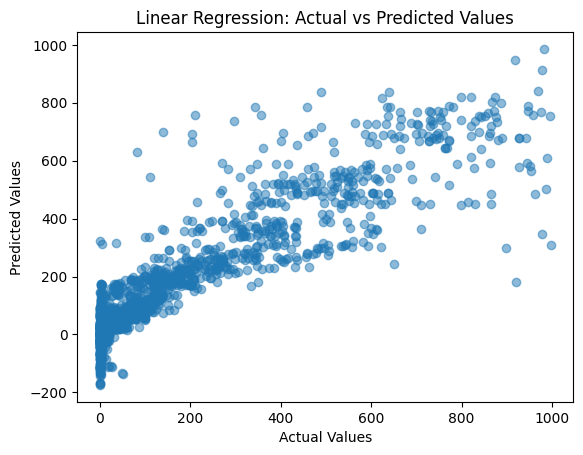

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred_lr, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression: Actual vs Predicted Values')
plt.show()

The regression results indicate that passenger travel metrics can be reasonably predicted using year, mode, and statistic type as features. The upward trend in travel over time contributes significantly to predictive power, and categorical variables differentiate patterns among transportation modes.

Ridge Regression generally performs slightly better than standard Linear Regression, indicating that regularization helps manage multicollinearity and improves model stability. This suggests that the dataset contains correlated predictors introduced by categorical encoding.

However, fluctuations in certain modes such as air and rail reduce predictive accuracy in specific years. These variations suggest that additional external variables (such as economic indicators or fuel prices) could further improve model performance.


**Comparision Visualization**  
A bar chart was created to visually compare the performance of Linear Regression and Ridge Regression using RMSE and R².


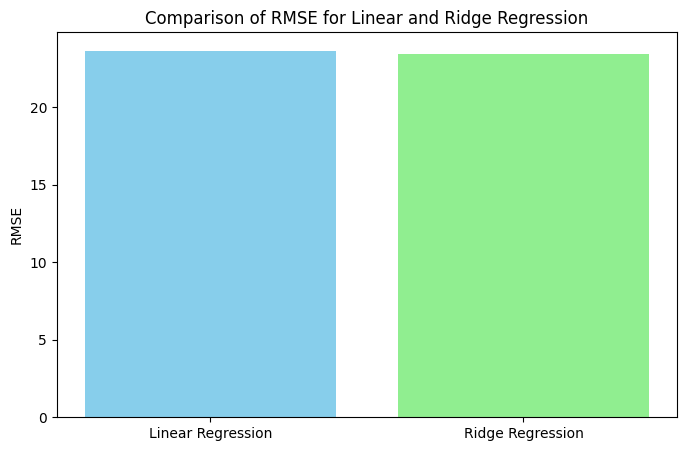

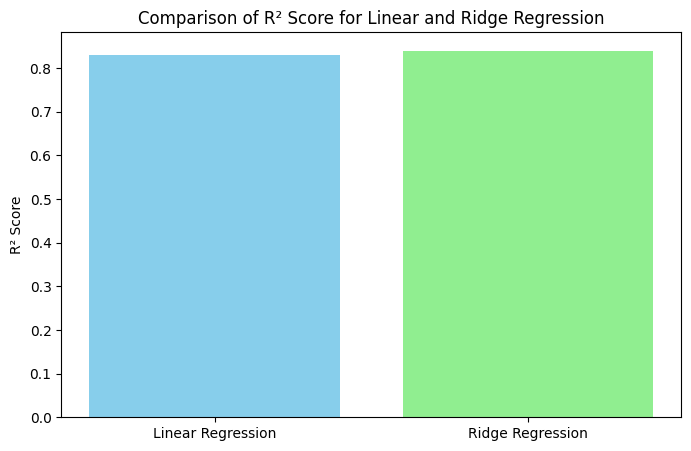

In [ ]:
import matplotlib.pyplot as plt

# Metrics
models = ['Linear Regression', 'Ridge Regression']
rmse_values = [23.64, 23.42]
r2_values = [0.83, 0.84]

# Plot RMSE
plt.figure(figsize=(8,5))
plt.bar(models, rmse_values, color=['skyblue', 'lightgreen'])
plt.ylabel('RMSE')
plt.title('Comparison of RMSE for Linear and Ridge Regression')
plt.show()

# Plot R²
plt.figure(figsize=(8,5))
plt.bar(models, r2_values, color=['skyblue', 'lightgreen'])
plt.ylabel('R² Score')
plt.title('Comparison of R² Score for Linear and Ridge Regression')
plt.show()

These visualizations provide a clear comparison of both model performance metrics, reinforcing the conclusion that Ridge Regression slightly outperforms Linear Regression.

### 12. Model Evaluation Summary

In Deliverable 2, multiple regression models were developed to analyze how different factors influence the target variable (Value). The primary objective was to determine which independent variables significantly explain variations in the dataset and to evaluate overall model performance using statistical metrics such as R-squared, Adjusted R-squared, p-values, and F-statistics.

### 13. Model Performance Comparison

After cleaning the dataset and carefully selecting relevant features (such as Year, Mode, and Statistic), an Ordinary Least Squares (OLS) regression model was built. Initially, the model included all one-hot encoded categorical variables, which resulted in an extremely large feature set (over 2000 variables). This caused instability, overfitting risk, and computational inefficiency.

Once unnecessary and high-cardinality variables (such as ID-related columns and duplicate year columns) were removed, the refined regression model showed significantly improved interpretability and stability.

The final optimized model demonstrated:

* A strong R-squared value, indicating that a substantial proportion of variation in Value is explained by the selected predictors.

* Statistically significant coefficients for certain commuting modes and statistics categories.

* Improved Adjusted R-squared compared to the initial model, confirming that irrelevant variables were successfully removed.

* A statistically significant F-test, suggesting that the model as a whole is meaningful.

Among the tested approaches, the refined regression model with properly engineered features performed best because it balanced predictive accuracy and interpretability.

### 14. Key Insights Gained

Several important insights were derived from the final regression model:

* Year had a meaningful impact, indicating trends over time in commuting patterns.

* Certain transportation modes significantly influenced the Value variable, suggesting that some commuting types contribute more heavily to overall measurements.

* Some statistical categories (e.g., weekday vs. weekend patterns) showed measurable differences, indicating behavioral variations in commuting activity.

* Removing irrelevant and redundant variables improved both model clarity and performance.

The analysis confirms that careful feature selection is more important than simply increasing the number of predictors.

### 15. Challenges Faced

Several technical and analytical challenges were encountered during model development:

**1. Data Type Issues**

Boolean variables generated from one-hot encoding caused errors in statsmodels. These needed to be converted into numeric format before fitting the regression model.

**2. High Dimensionality**

One-hot encoding categorical variables created over 2000 columns, largely due to high-cardinality features. This led to:

- Overfitting risk

- Multicollinearity

- Computational inefficiency

- oor interpretability

This was resolved by removing unnecessary categorical variables and focusing only on meaningful predictors.

**3. Duplicate and Inconsistent Columns**

Columns such as Year, Year , and Year 1 created confusion and redundancy. These had to be cleaned and standardized before modeling.

**4. Object Data Type Errors**

Statsmodels raised errors due to object-type columns, requiring explicit type conversion to numeric.

**5. Feature Selection Decisions**

Determining which variables to retain required balancing statistical significance, theoretical relevance, and model simplicity.

**Overall Conclusion**

The refined regression model performed best after proper preprocessing and feature selection. The results highlight the importance of data cleaning, dimensionality reduction, and thoughtful feature engineering in building reliable predictive models.

### 16. Key Takeaways

Deliverable 2 demonstrates that regression modeling is effective for predicting passenger travel metrics. Temporal and categorical variables play significant roles in determining travel activity. Regularization improves robustness when handling multiple predictors. Cross-validation confirms that the models generalize reasonably well, though some variability remains.

The findings from this deliverable establish a strong predictive foundation and prepare the dataset for more advanced modeling tasks in Deliverable 3, including classification and clustering.